### Installing requirements

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     -------------------------------- ----- 51.2/59.7 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 396.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 3.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/11.5 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.5 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.5 MB 3.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.5 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.5 MB 3.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.5 MB 4.7 MB/s eta 0:00:03
   ------ ---

In [5]:
pip install matplotlib

     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     ------ ------------------------------ 30.7/167.0 kB 660.6 kB/s eta 0:00:01
     --------------- --------------------- 71.7/167.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  163.8/167.0 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 167.0/167.0 kB 838.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.2/7.8 MB 11.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/7.8 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/7.8 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/7.8 MB 7.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.8 MB 8.8 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 8.6 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install scanpy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 815.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

### Reading all files individually

In [19]:
import gzip
import pandas as pd

# Reading tsv.gz files using common functions
def read_tsv_gz(file_path):
    with gzip.open(file_path, 'rt') as f:  #'rt' mode reads text from compressed file
        df= pd.read_csv(f, sep='\t', header=None)  #tab-separated values
    return df


In [20]:
import gzip
from scipy.io import mmread
import pandas as pd

# Function to read .mtx.gz file 
def read_mtx_gz(file_path):
    with gzip.open(file_path, 'rb') as f:  # 'rb' mode reads binary from compressed file
        matrix = mmread(f)  # this is a sparse matrix

    #sparse matrix to a data frame
    df = pd.DataFrame(matrix.toarray())  
    df= df.T #cells x genes format 
    return df

#### Cell Barcodes

In [4]:

file_path1 = 'GSM3596320_GM18502_barcodes.tsv.gz'
cell_line_1_barcodes_df = read_tsv_gz(file_path1)

In [5]:
cell_line_1_barcodes_df

0
0     AAACCTGAGGCATGTG-1
1     AAACCTGAGGTGGGTT-1
2     AAACCTGCAGATAATG-1
3     AAACCTGGTCGCGAAA-1
4     AAACCTGGTGATAAAC-1
...                  ...
5525  TTTGTCACAAGTTGTC-1
5526  TTTGTCACACTTAAGC-1
5527  TTTGTCACATTGAGCT-1
5528  TTTGTCATCAGATAAG-1
5529  TTTGTCATCGAGAACG-1

[5530 rows x 1 columns]

In [6]:
cell_line_1_barcodes_df[0] = cell_line_1_barcodes_df[0].str.replace('-1', '')

In [7]:
cell_line_1_barcodes_df

0
0     AAACCTGAGGCATGTG
1     AAACCTGAGGTGGGTT
2     AAACCTGCAGATAATG
3     AAACCTGGTCGCGAAA
4     AAACCTGGTGATAAAC
...                ...
5525  TTTGTCACAAGTTGTC
5526  TTTGTCACACTTAAGC
5527  TTTGTCACATTGAGCT
5528  TTTGTCATCAGATAAG
5529  TTTGTCATCGAGAACG

[5530 rows x 1 columns]

In [8]:
file_path2 = 'GSM3596321_GM12878_barcodes.tsv.gz'
cell_line_2_barcodes_df = read_tsv_gz(file_path2)
cell_line_2_barcodes_df[0] = cell_line_2_barcodes_df[0].str.replace('-1', '')

In [9]:
cell_line_2_barcodes_df

0
0     AAACCTGAGACCCACC
1     AAACCTGAGAGGTAGA
2     AAACCTGAGATGTCGG
3     AAACCTGAGTATCGAA
4     AAACCTGAGTGGCACA
...                ...
7242  TTTGTCAGTACTCAAC
7243  TTTGTCAGTGCAACGA
7244  TTTGTCATCCCTAATT
7245  TTTGTCATCGCTGATA
7246  TTTGTCATCTTGTACT

[7247 rows x 1 columns]

In [10]:
file_path3 = 'GSM3596322_MIX_barcodes.tsv.gz'
cell_line_mix_barcodes_df = read_tsv_gz(file_path3)
cell_line_mix_barcodes_df[0] = cell_line_mix_barcodes_df[0].str.replace('-1', '')

In [11]:
cell_line_mix_barcodes_df

0
0     AAACCTGAGTCGTACT
1     AAACCTGAGTTACGGG
2     AAACCTGAGTTGTCGT
3     AAACCTGCATGCTAGT
4     AAACCTGTCAGCTTAG
...                ...
5823  TTTGTCAGTACAGTGG
5824  TTTGTCAGTAGTGAAT
5825  TTTGTCAGTCGCTTCT
5826  TTTGTCAGTCGTCTTC
5827  TTTGTCATCCACTGGG

[5828 rows x 1 columns]

#### Cell QC

In [13]:
file_path4 = 'GSM3596320_GM18502_cellQC.tsv.gz'
cell_line_1_qc_df = read_tsv_gz(file_path4)

In [14]:
cell_line_1_qc_df

UMI  geneNumber  mtProportion cellPhase
AAACCTGAGGCATGTG  22707        3890         0.040         S
AAACCTGAGGTGGGTT  13790        2815         0.010        G1
AAACCTGCAGATAATG  35027        4290         0.018         S
AAACCTGGTCGCGAAA  26763        3614         0.034        G1
AAACCTGGTGATAAAC  46317        5612         0.043       G2M
...                 ...         ...           ...       ...
TTTGTCACAAGTTGTC  32201        4590         0.033       G2M
TTTGTCACACTTAAGC  25892        4432         0.036       G2M
TTTGTCACATTGAGCT  38674        4992         0.046         S
TTTGTCATCAGATAAG  20582        3922         0.028       G2M
TTTGTCATCGAGAACG  25985        3748         0.037       G2M

[5530 rows x 4 columns]

In [15]:
file_path5 = 'GSM3596321_GM12878_cellQC.tsv.gz'
cell_line_2_qc_df = read_tsv_gz(file_path5)

In [16]:
cell_line_2_qc_df

UMI  geneNumber  mtProportion cellPhase
AAACCTGAGACCCACC  14975        2767         0.034        G1
AAACCTGAGAGGTAGA  25084        3743         0.044       G2M
AAACCTGAGATGTCGG  13749        2614         0.037        G1
AAACCTGAGTATCGAA  20444        2799         0.041        G1
AAACCTGAGTGGCACA  10485        1796         0.066        G1
...                 ...         ...           ...       ...
TTTGTCAGTACTCAAC   9659        2524         0.029        G1
TTTGTCAGTGCAACGA  20691        2769         0.031        G1
TTTGTCATCCCTAATT  14273        2143         0.028        G1
TTTGTCATCGCTGATA  26498        3634         0.034        G1
TTTGTCATCTTGTACT  22547        4022         0.051         S

[7247 rows x 4 columns]

In [17]:
file_path6 = 'GSM3596322_MIX_cellQC.tsv.gz'
cell_line_mix_qc_df = read_tsv_gz(file_path6)

In [18]:
cell_line_mix_qc_df

UMI  geneNumber  mtProportion cellPhase
AAACCTGAGTCGTACT  24366        3370         0.023        G1
AAACCTGAGTTACGGG   8158        2049         0.018       G2M
AAACCTGAGTTGTCGT  37374        4443         0.056        G1
AAACCTGCATGCTAGT  14591        3533         0.023       G2M
AAACCTGTCAGCTTAG  45813        5324         0.035       G2M
...                 ...         ...           ...       ...
TTTGTCAGTACAGTGG  19510        3036         0.024        G1
TTTGTCAGTAGTGAAT  29213        4540         0.042         S
TTTGTCAGTCGCTTCT  58172        6060         0.055       G2M
TTTGTCAGTCGTCTTC  25040        4032         0.035       G2M
TTTGTCATCCACTGGG  19136        2918         0.042        G1

[5828 rows x 4 columns]

#### Genes

In [21]:
file_path7 = 'GSM3596320_GM18502_genes.tsv.gz'
cell_line_1_genes_df = read_tsv_gz(file_path7)

In [22]:
cell_line_1_genes_df

0             1
0      ENSG00000243485  RP11-34P13.3
1      ENSG00000237613       FAM138A
2      ENSG00000186092         OR4F5
3      ENSG00000238009  RP11-34P13.7
4      ENSG00000239945  RP11-34P13.8
...                ...           ...
33689  ENSG00000277856    AC233755.2
33690  ENSG00000275063    AC233755.1
33691  ENSG00000271254    AC240274.1
33692  ENSG00000277475    AC213203.1
33693  ENSG00000268674       FAM231B

[33694 rows x 2 columns]

In [23]:
file_path8 = 'GSM3596321_GM12878_genes.tsv.gz'
cell_line_2_genes_df = read_tsv_gz(file_path8)

In [24]:
cell_line_2_genes_df

0             1
0      ENSG00000243485  RP11-34P13.3
1      ENSG00000237613       FAM138A
2      ENSG00000186092         OR4F5
3      ENSG00000238009  RP11-34P13.7
4      ENSG00000239945  RP11-34P13.8
...                ...           ...
33689  ENSG00000277856    AC233755.2
33690  ENSG00000275063    AC233755.1
33691  ENSG00000271254    AC240274.1
33692  ENSG00000277475    AC213203.1
33693  ENSG00000268674       FAM231B

[33694 rows x 2 columns]

In [25]:
file_path9 = 'GSM3596321_GM12878_genes.tsv.gz'
cell_line_mix_genes_df = read_tsv_gz(file_path9)

In [26]:
cell_line_mix_genes_df

0             1
0      ENSG00000243485  RP11-34P13.3
1      ENSG00000237613       FAM138A
2      ENSG00000186092         OR4F5
3      ENSG00000238009  RP11-34P13.7
4      ENSG00000239945  RP11-34P13.8
...                ...           ...
33689  ENSG00000277856    AC233755.2
33690  ENSG00000275063    AC233755.1
33691  ENSG00000271254    AC240274.1
33692  ENSG00000277475    AC213203.1
33693  ENSG00000268674       FAM231B

[33694 rows x 2 columns]

#### Counts matrix

In [27]:
file_path10 = 'GSM3596320_GM18502_matrix.mtx.gz'
cell_line_1_matrix_df =read_mtx_gz(file_path10)

In [28]:
cell_line_1_matrix_df

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      2   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5525      0      0      0      0      0      0      0      0      3      0   
5526      0      0      0      0      0      0      0      0      0      1   
5527      0      0      0      0      0      0      0      0      0      0   
5528      0      0      0      0      0      0      0      0      0      0   
5529      0      0      0      0      0      0      0      0      1      0   

      ...  33684  33685  33686  33687  33688  33689  33690  33691  33692  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      1      0      0      0      0      0      0   
4     ...      0      0      1      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5525  ...      0      0      0      0      0      0      0      0      0   
5526  ...      0      0      0      0      0      0      0      0      0   
5527  ...      0      0      0      0      0      0      0      0      0   
5528  ...      0      0      0      0      0      0      0      0      0   
5529  ...      0      0      0      0      0      0      0      0      0   

      33693  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5525      0  
5526      0  
5527      0  
5528      0  
5529      0  

[5530 rows x 33694 columns]

In [29]:
sum(cell_line_1_matrix_df.iloc[0,:])

22707

In [30]:
file_path11 = 'GSM3596321_GM12878_matrix.mtx.gz'
cell_line_2_matrix_df =read_mtx_gz(file_path11)

In [31]:
cell_line_2_matrix_df

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7242      0      0      0      0      0      0      0      0      0      0   
7243      0      0      0      0      0      0      0      0      1      0   
7244      0      0      0      0      0      0      0      0      0      0   
7245      0      0      0      0      0      0      0      0      0      0   
7246      0      0      0      0      0      0      0      0      0      0   

      ...  33684  33685  33686  33687  33688  33689  33690  33691  33692  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7242  ...      0      0      0      0      0      0      0      0      0   
7243  ...      0      0      0      0      0      0      0      0      0   
7244  ...      0      0      0      0      0      0      0      0      0   
7245  ...      0      0      0      0      0      0      0      0      0   
7246  ...      0      0      0      0      0      0      0      0      0   

      33693  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
7242      0  
7243      0  
7244      0  
7245      0  
7246      0  

[7247 rows x 33694 columns]

In [32]:
file_path12 = 'GSM3596322_MIX_matrix.mtx.gz'
cell_line_mix_matrix_df =read_mtx_gz(file_path12)

In [33]:
cell_line_mix_matrix_df

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      1      0   
3         0      0      0      0      0      0      0      0      1      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5823      0      0      0      0      0      0      0      0      0      0   
5824      0      0      0      0      0      0      0      0      0      1   
5825      0      0      0      0      0      0      0      0      1      0   
5826      0      0      0      0      0      0      0      0      0      1   
5827      0      0      0      0      0      0      0      0      0      0   

      ...  33684  33685  33686  33687  33688  33689  33690  33691  33692  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5823  ...      0      0      0      0      0      0      0      0      0   
5824  ...      0      0      0      0      0      0      0      0      0   
5825  ...      0      0      0      0      0      0      0      0      0   
5826  ...      0      0      0      0      0      0      0      0      0   
5827  ...      0      0      0      0      0      0      0      0      0   

      33693  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5823      0  
5824      0  
5825      0  
5826      0  
5827      0  

[5828 rows x 33694 columns]

In [34]:
file_path13 = 'GSM3596322_MIX_cellLineage.tsv.gz'
cell_line_mix_cellLineage_df =  read_tsv_gz(file_path13)

In [35]:
cell_line_mix_cellLineage_df

0    1
0     AAACCTGAGTCGTACT-1  YRI
1     AAACCTGAGTTACGGG-1  YRI
2     AAACCTGAGTTGTCGT-1  YRI
3     AAACCTGCATGCTAGT-1  YRI
4     AAACCTGTCAGCTTAG-1  YRI
...                  ...  ...
5823  TTTGTCAGTACAGTGG-1  YRI
5824  TTTGTCAGTAGTGAAT-1  YRI
5825  TTTGTCAGTCGCTTCT-1  CEU
5826  TTTGTCAGTCGTCTTC-1  YRI
5827  TTTGTCATCCACTGGG-1  CEU

[5828 rows x 2 columns]

In [36]:
cell_line_mix_cellLineage_df[0] = cell_line_mix_cellLineage_df[0].str.replace('-1', '')

In [37]:
cell_line_mix_cellLineage_df

0    1
0     AAACCTGAGTCGTACT  YRI
1     AAACCTGAGTTACGGG  YRI
2     AAACCTGAGTTGTCGT  YRI
3     AAACCTGCATGCTAGT  YRI
4     AAACCTGTCAGCTTAG  YRI
...                ...  ...
5823  TTTGTCAGTACAGTGG  YRI
5824  TTTGTCAGTAGTGAAT  YRI
5825  TTTGTCAGTCGCTTCT  CEU
5826  TTTGTCAGTCGTCTTC  YRI
5827  TTTGTCATCCACTGGG  CEU

[5828 rows x 2 columns]

In [130]:
cell_line_mix_cellLineage_df[1].value_counts()

1
YRI    3492
CEU    2328
0         8
Name: count, dtype: int64

## Cell line 1 and Cell line 2 mix 

### Pre-processing

#### Creating AnnData objects
        

In [38]:
cell_line_mix_sc= sc.AnnData(cell_line_mix_matrix_df)

C:\Users\Neermita Bhattachary\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\Neermita Bhattachary\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [39]:
cell_line_mix_sc

AnnData object with n_obs × n_vars = 5828 × 33694

In [40]:
cell_line_mix_sc.obs.index= cell_line_mix_barcodes_df[0].to_numpy()

In [41]:
cell_line_mix_sc.obs

Empty DataFrame
Columns: []
Index: [AAACCTGAGTCGTACT, AAACCTGAGTTACGGG, AAACCTGAGTTGTCGT, AAACCTGCATGCTAGT, AAACCTGTCAGCTTAG, AAACCTGTCCGTTGTC, AAACGGGAGAGGACGG, AAACGGGAGATGAGAG, AAACGGGAGCTGATAA, AAACGGGAGTACGCCC, AAACGGGAGTGCCAGA, AAACGGGGTTCCAACA, AAACGGGGTTGATTGC, AAACGGGTCAGTGTTG, AAACGGGTCCACTGGG, AAACGGGTCTCCAACC, AAAGATGAGAAACCGC, AAAGATGAGAAAGTGG, AAAGATGAGTGAACGC, AAAGATGCACAACTGT, AAAGATGCACGGATAG, AAAGATGCAGCTGCAC, AAAGATGCAGGTTTCA, AAAGATGCATCGGTTA, AAAGATGGTCCGTTAA, AAAGATGTCACAACGT, AAAGATGTCGCGCCAA, AAAGATGTCTGGTGTA, AAAGCAAAGACTCGGA, AAAGCAAAGACTTGAA, AAAGCAAAGATCGATA, AAAGCAAAGCTGCGAA, AAAGCAAAGGCTAGAC, AAAGCAAAGTAATCCC, AAAGCAAAGTGTGAAT, AAAGCAACAAGTCATC, AAAGCAACAGCCAGAA, AAAGCAACATGGAATA, AAAGCAAGTAAGGGAA, AAAGCAAGTCAACTGT, AAAGCAAGTTAAGATG, AAAGCAAGTTGGTAAA, AAAGCAATCAGGATCT, AAAGCAATCGAACGGA, AAAGCAATCTACCTGC, AAAGCAATCTGTTTGT, AAAGTAGAGTAGGTGC, AAAGTAGAGTATGACA, AAAGTAGAGTCAATAG, AAAGTAGAGTCTCAAC, AAAGTAGAGTTAGGTA, AAAGTAGCACTTAAGC, AAAGTAGGTAATTGGA, AAAGTAGGTCCGAAGA, AAAGTAGGTCGACTGC, AAAGTAGGTCGGGTCT, AAAGTAGGTCTAGGTT, AAAGTAGGTGTTAAGA, AAAGTAGGTTCACGGC, AAAGTAGTCATGCAAC, AAAGTAGTCCGCATCT, AAAGTAGTCCTTAATC, AAAGTAGTCTGCGACG, AAATGCCAGAGTGACC, AAATGCCAGCCGCCTA, AAATGCCAGGGTGTGT, AAATGCCCAAACCTAC, AAATGCCCAGTGACAG, AAATGCCGTGATGATA, AAATGCCGTTCCATGA, AAATGCCTCAATACCG, AAATGCCTCGGAATCT, AAATGCCTCTTGCCGT, AACACGTAGACCACGA, AACACGTAGCTAGTTC, AACACGTAGTCGAGTG, AACACGTCACAGATTC, AACACGTCAGGCTCAC, AACACGTCAGGGTACA, AACACGTCAGGGTATG, AACACGTCATGAACCT, AACACGTGTACTTGAC, AACACGTGTCTCACCT, AACACGTGTTCGGGCT, AACACGTTCATGCATG, AACACGTTCTTCAACT, AACCATGAGGACATTA, AACCATGAGGCTCATT, AACCATGAGTTCGCAT, AACCATGCAGGTCTCG, AACCATGCATATGGTC, AACCATGGTACAGACG, AACCATGGTTCGTCTC, AACCATGTCCACGACG, AACCGCGAGTGAAGAG, AACCGCGAGTTGTAGA, AACCGCGAGTTGTCGT, AACCGCGCACGGTTTA, AACCGCGGTACCTACA, AACCGCGGTCTTCGTC, ...]

[5828 rows x 0 columns]

In [42]:
cell_line_mix_sc.obs['cellPhase']=cell_line_mix_qc_df['cellPhase'].to_numpy()
cell_line_mix_sc.obs['cellLineage']=cell_line_mix_cellLineage_df[1].to_numpy()

In [43]:
cell_line_mix_sc.obs

cellPhase cellLineage
AAACCTGAGTCGTACT        G1         YRI
AAACCTGAGTTACGGG       G2M         YRI
AAACCTGAGTTGTCGT        G1         YRI
AAACCTGCATGCTAGT       G2M         YRI
AAACCTGTCAGCTTAG       G2M         YRI
...                    ...         ...
TTTGTCAGTACAGTGG        G1         YRI
TTTGTCAGTAGTGAAT         S         YRI
TTTGTCAGTCGCTTCT       G2M         CEU
TTTGTCAGTCGTCTTC       G2M         YRI
TTTGTCATCCACTGGG        G1         CEU

[5828 rows x 2 columns]

In [44]:
cell_line_mix_sc.var.index= cell_line_mix_genes_df[1].to_numpy()

In [45]:
cell_line_mix_sc.var["gene ids"]= cell_line_mix_genes_df[0].to_numpy()

In [46]:
cell_line_mix_sc.var

gene ids
RP11-34P13.3  ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC233755.2    ENSG00000277856
AC233755.1    ENSG00000275063
AC240274.1    ENSG00000271254
AC213203.1    ENSG00000277475
FAM231B       ENSG00000268674

[33694 rows x 1 columns]

In [47]:
cell_line_mix_sc

AnnData object with n_obs × n_vars = 5828 × 33694
    obs: 'cellPhase', 'cellLineage'
    var: 'gene ids'

In [48]:
cell_line_mix_sc.obs.value_counts()

cellPhase  cellLineage
G1         YRI            1651
           CEU            1506
S          YRI             967
G2M        YRI             874
           CEU             417
S          CEU             405
G1         0                 5
G2M        0                 2
S          0                 1
Name: count, dtype: int64

#### Plots for Quality Control

In [55]:
cell_line_mix_sc.var["mt"] = cell_line_mix_sc.var_names.str.startswith("MT")

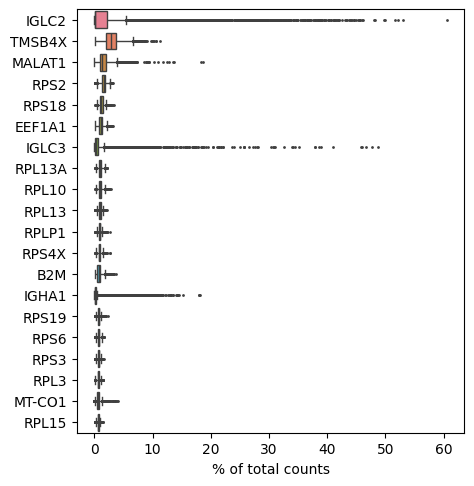

In [56]:
sc.pl.highest_expr_genes(cell_line_mix_sc, n_top=20)

In [57]:
cell_line_mix_sc.var_names_make_unique()

In [104]:
cell_line_mix_sc_n= cell_line_mix_sc.copy()
sc.pp.calculate_qc_metrics(cell_line_mix_sc_n, qc_vars=["mt"],percent_top=None, log1p=False, inplace=True)

In [105]:
cell_line_mix_sc_n.var

gene ids     mt  n_cells_by_counts  mean_counts  \
RP11-34P13.3  ENSG00000243485  False                  0     0.000000   
FAM138A       ENSG00000237613  False                  0     0.000000   
OR4F5         ENSG00000186092  False                  0     0.000000   
RP11-34P13.7  ENSG00000238009  False                 14     0.002402   
RP11-34P13.8  ENSG00000239945  False                  1     0.000172   
...                       ...    ...                ...          ...   
AC233755.2    ENSG00000277856  False                  0     0.000000   
AC233755.1    ENSG00000275063  False                  0     0.000000   
AC240274.1    ENSG00000271254  False                 78     0.014242   
AC213203.1    ENSG00000277475  False                  0     0.000000   
FAM231B       ENSG00000268674  False                  0     0.000000   

              pct_dropout_by_counts  total_counts  
RP11-34P13.3             100.000000             0  
FAM138A                  100.000000             0  
OR4F5                    100.000000             0  
RP11-34P13.7              99.759780            14  
RP11-34P13.8              99.982841             1  
...                             ...           ...  
AC233755.2               100.000000             0  
AC233755.1               100.000000             0  
AC240274.1                98.661633            83  
AC213203.1               100.000000             0  
FAM231B                  100.000000             0  

[33694 rows x 6 columns]

In [106]:
cell_line_mix_sc_n.obs

cellPhase cellLineage  n_genes_by_counts  total_counts  \
AAACCTGAGTCGTACT        G1         YRI               3370         24366   
AAACCTGAGTTACGGG       G2M         YRI               2049          8158   
AAACCTGAGTTGTCGT        G1         YRI               4443         37374   
AAACCTGCATGCTAGT       G2M         YRI               3533         14591   
AAACCTGTCAGCTTAG       G2M         YRI               5324         45813   
...                    ...         ...                ...           ...   
TTTGTCAGTACAGTGG        G1         YRI               3036         19510   
TTTGTCAGTAGTGAAT         S         YRI               4540         29213   
TTTGTCAGTCGCTTCT       G2M         CEU               6060         58172   
TTTGTCAGTCGTCTTC       G2M         YRI               4032         25040   
TTTGTCATCCACTGGG        G1         CEU               2918         19136   

                  total_counts_mt  pct_counts_mt  
AAACCTGAGTCGTACT              612       2.511697  
AAACCTGAGTTACGGG              156       1.912233  
AAACCTGAGTTGTCGT             2152       5.758014  
AAACCTGCATGCTAGT              361       2.474128  
AAACCTGTCAGCTTAG             1723       3.760941  
...                           ...            ...  
TTTGTCAGTACAGTGG              494       2.532035  
TTTGTCAGTAGTGAAT             1315       4.501421  
TTTGTCAGTCGCTTCT             3355       5.767379  
TTTGTCAGTCGTCTTC              919       3.670128  
TTTGTCATCCACTGGG              842       4.400084  

[5828 rows x 6 columns]

In [107]:
cell_line_mix_sc_n

AnnData object with n_obs × n_vars = 5828 × 33694
    obs: 'cellPhase', 'cellLineage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

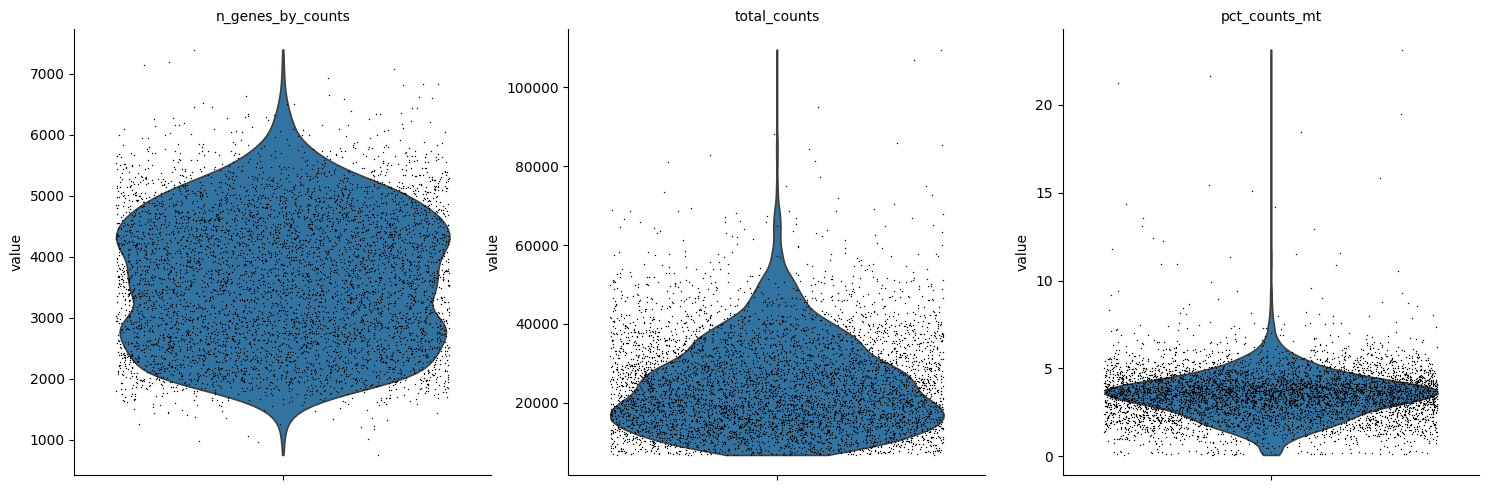

In [108]:
sc.pl.violin(cell_line_mix_sc_n, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

We infer that the dataset is a good quality dataset. There aren't many cells expressing too little genes and the percemtage of mt genes being expressed is also below 30%. The plot belows summarizes these observations together. 

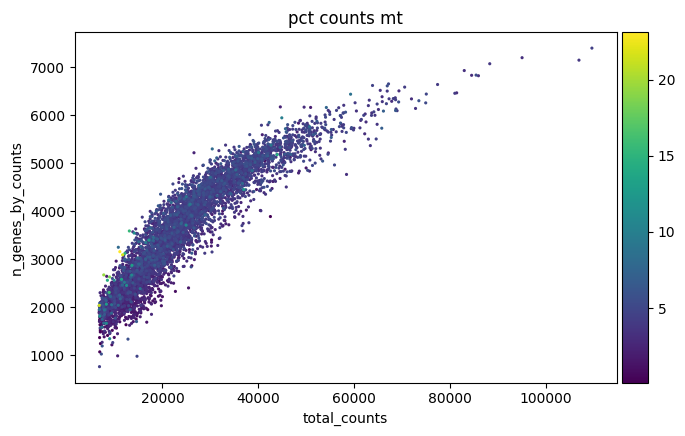

In [109]:
sc.pl.scatter(cell_line_mix_sc_n, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

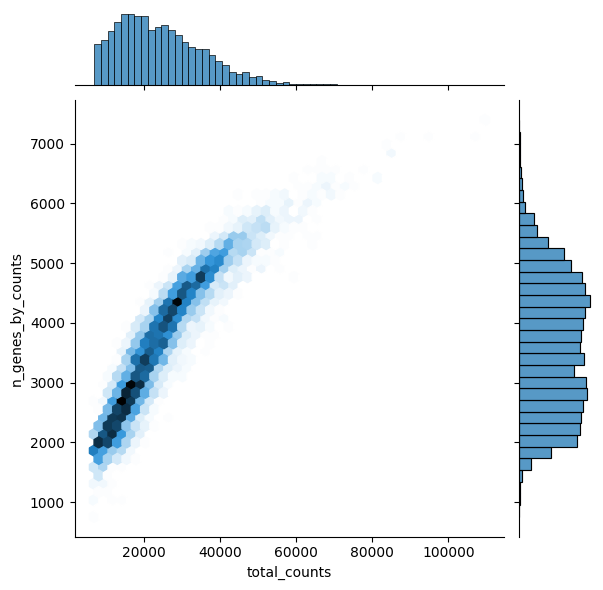

In [110]:
import seaborn as sns
sns.jointplot(
    data=cell_line_mix_sc_n.obs,
    x="total_counts",
    y="n_genes_by_counts",
    kind="hex",
)

The plot above gives a better understanding of the distribution of genes in the cells.

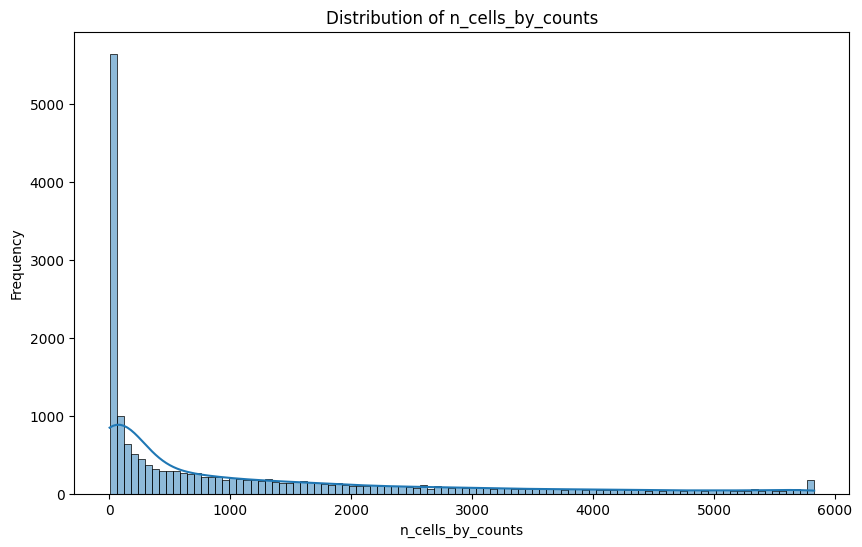

In [134]:
n_cells_by_counts = cell_line_mix_sc_n.var['n_cells_by_counts']
plt.figure(figsize=(10, 6))
sns.histplot(n_cells_by_counts, bins=100, kde=True)
plt.title('Distribution of n_cells_by_counts')
plt.xlabel('n_cells_by_counts')
plt.ylabel('Frequency')
plt.show()

In [143]:
pd.DataFrame(cell_line_mix_sc_n.var.n_cells_by_counts<50).value_counts()

n_cells_by_counts
False                12743
True                  5330
Name: count, dtype: int64

Around 5000 genes expressed in less than 50 cells.

#### Quality Control

There aren't any visible cells that express very few genes. Hence, cells expressing minumum 100 genes are removed(almost none in this dataset).

In [113]:
sc.pp.filter_cells(cell_line_mix_sc_n, min_genes=100)

The genes that are expressed in only 3 cells should be filtered out.

In [114]:
sc.pp.filter_genes(cell_line_mix_sc_n, min_cells=3)

Cells with very high number of detected genes may represent doublets. Hence, these are filtered out.

In [115]:
cell_line_mix_sc_n = cell_line_mix_sc_n[cell_line_mix_sc_n.obs.n_genes_by_counts < 7000, :]

Cells with high fraction of mitochondrial counts are generally dead or injured cells. So, they are filtered out.

In [116]:
cell_line_mix_sc_n = cell_line_mix_sc_n[cell_line_mix_sc_n.obs.pct_counts_mt < 7, :]

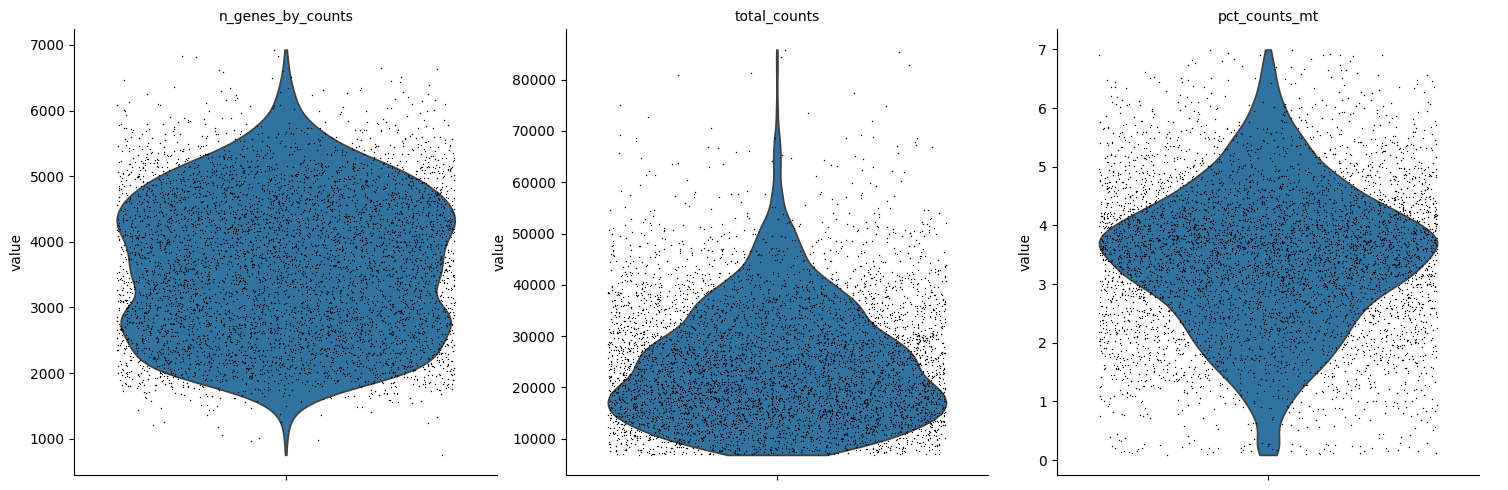

In [117]:
sc.pl.violin(cell_line_mix_sc_n, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

#### Normalization

In [118]:
normal_cell_line_mix_sc_n = cell_line_mix_sc_n.copy()

In [119]:
sc.pp.normalize_total(normal_cell_line_mix_sc_n)
sc.pp.log1p(normal_cell_line_mix_sc_n)

### Visualization

#### Filtering Highly Variable Genes

In [148]:
hvg_cell_line_mix_sc_n = normal_cell_line_mix_sc_n.copy()

In [149]:
sc.pp.highly_variable_genes(hvg_cell_line_mix_sc_n, n_top_genes=2000)

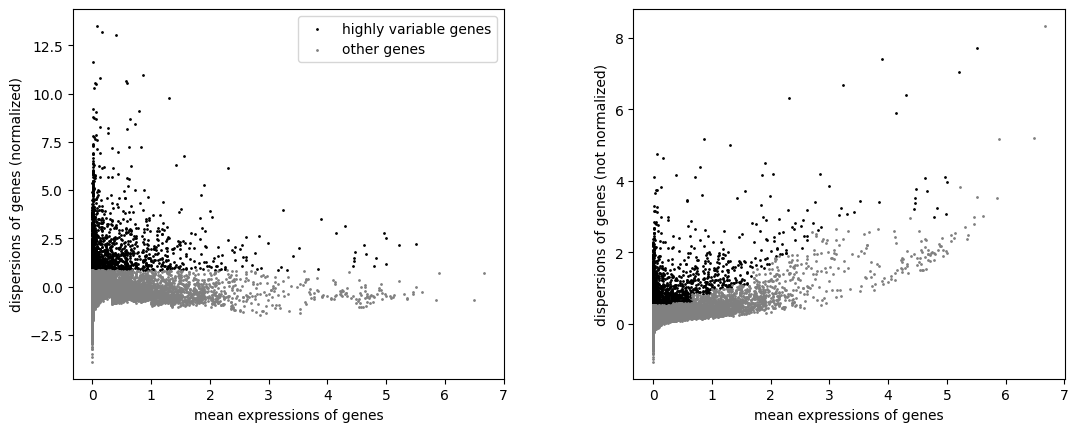

In [150]:
sc.pl.highly_variable_genes(hvg_cell_line_mix_sc_n)

#### Reducing dimensionality of data using PCA (projects features to a linear combination of those features)

In [151]:
pca_cell_line_mix_sc_n = hvg_cell_line_mix_sc_n.copy()

In [161]:
sc.tl.pca(pca_cell_line_mix_sc_n, n_comps=50)

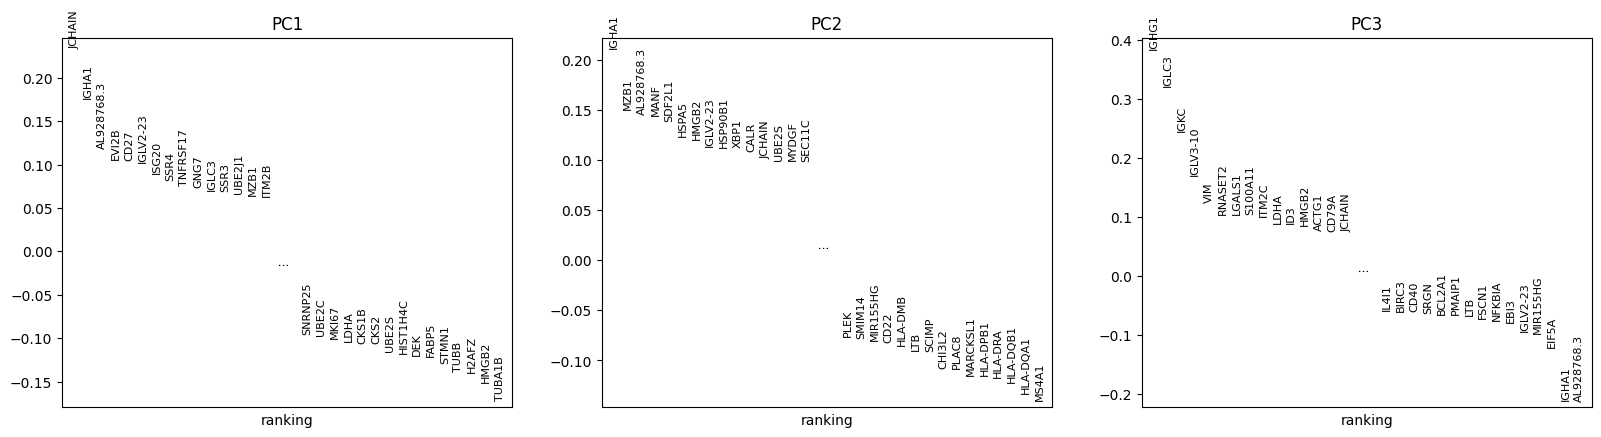

In [162]:
sc.pl.pca_loadings(pca_cell_line_mix_sc_n)

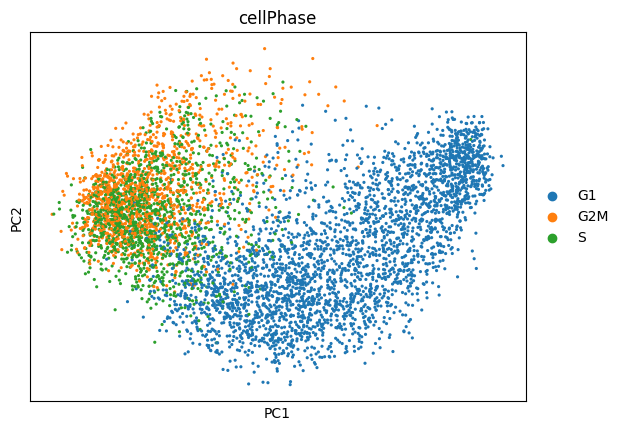

In [163]:
sc.pl.pca(pca_cell_line_mix_sc_n, color="cellPhase")

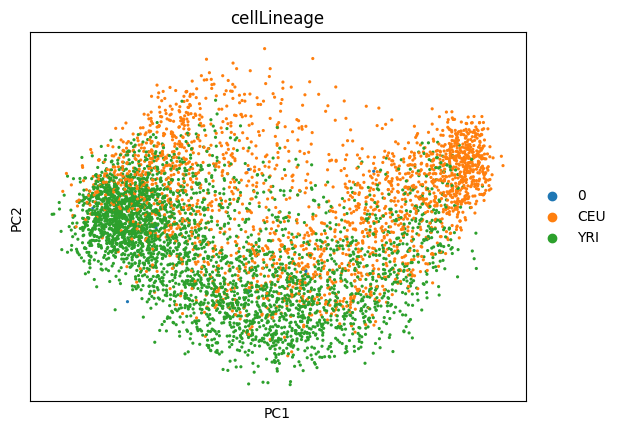

In [164]:
sc.pl.pca(pca_cell_line_mix_sc_n, color="cellLineage")

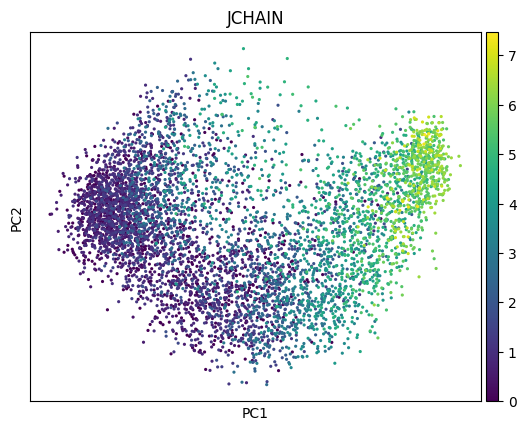

In [165]:
sc.pl.pca(pca_cell_line_mix_sc_n, color="JCHAIN")

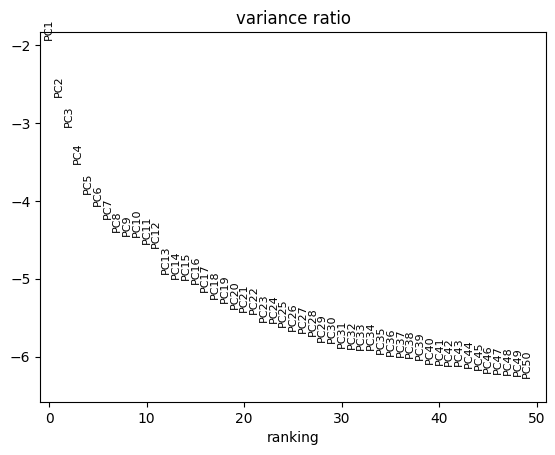

In [167]:
sc.pl.pca_variance_ratio(pca_cell_line_mix_sc_n, n_pcs=50, log=True)

The variance ratio plot above tells us that about 35-50 PCs are required to capture most of the information.

#### UMAP

In [168]:
sc.pp.neighbors(pca_cell_line_mix_sc_n)

In [169]:
sc.tl.umap(pca_cell_line_mix_sc_n)

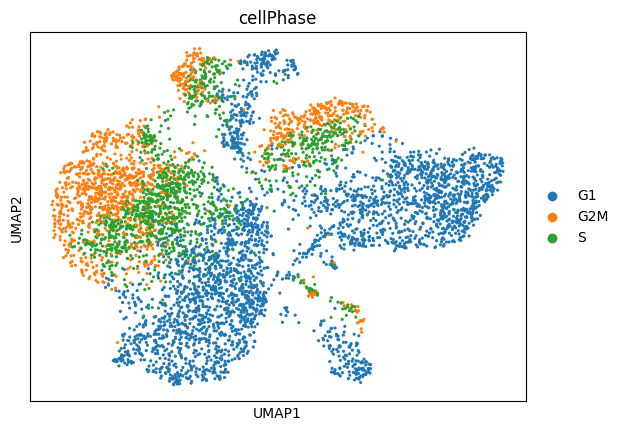

In [172]:
sc.pl.umap(pca_cell_line_mix_sc_n, color="cellPhase")

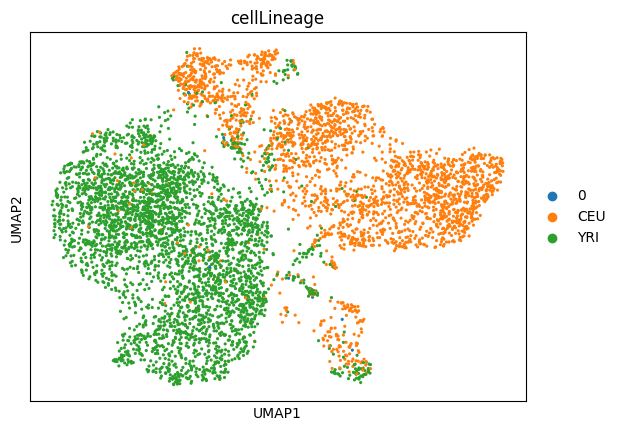

In [173]:
sc.pl.umap(pca_cell_line_mix_sc_n, color="cellLineage")

What we notice is that batch effect is possible. The dataset's origin is a lymphoblastoid cell line, so it should have some cells that are common to both. 

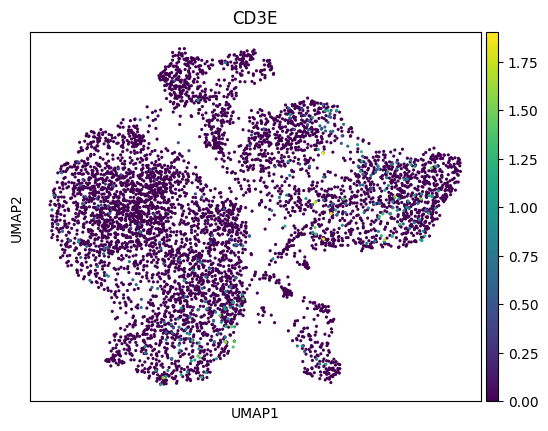

In [182]:
sc.pl.umap(pca_cell_line_mix_sc_n, color="CD3E")

In [174]:
pc1_loadings = pca_cell_line_mix_sc_n.varm['PCs'][:, 0]

In [193]:
#top genes contributing to PC1
top_genes_pc1 = np.argsort(np.abs(pc1_loadings))[::-1]

In [194]:
top_gene_names = pca_cell_line_mix_sc_n.var_names[top_genes_pc1]

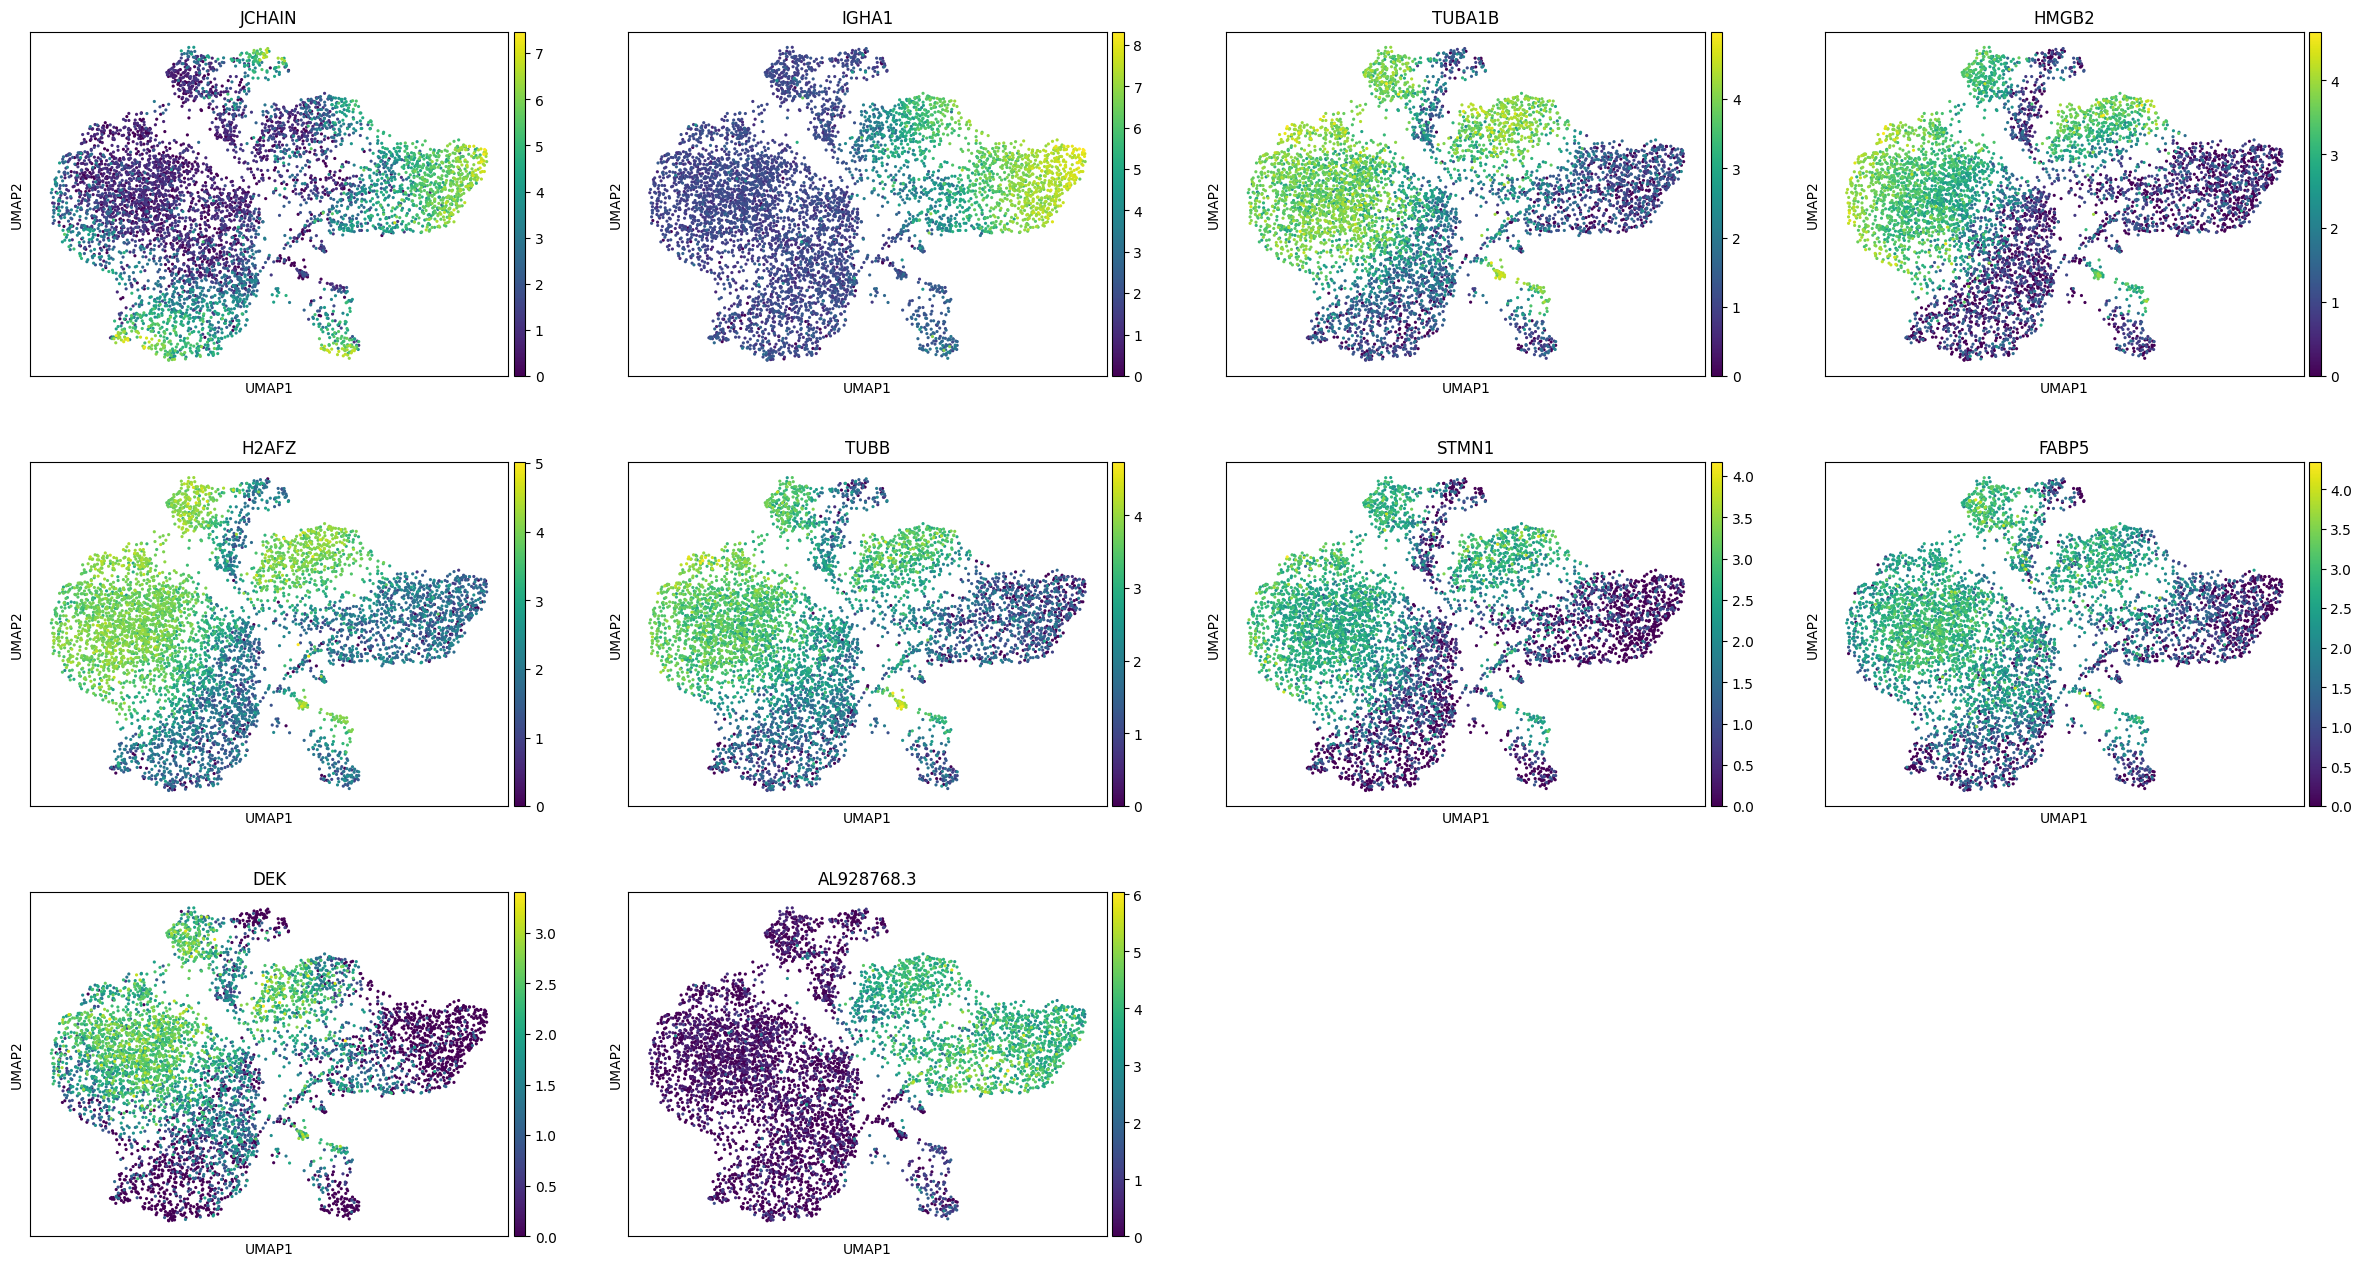

In [195]:
sc.pl.umap(pca_cell_line_mix_sc_n, color=top_gene_names[:10])

#### Removing batch effect

In [192]:
pip install bbknn

  Using cached bbknn-1.6.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached annoy-1.17.3.tar.gz (647 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached bbknn-1.6.0-py3-none-any.whl (14 kB)
Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl (2.8 MB)
Failed to build annoy
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [12 lines of output]
  C:\Users\Neermita Bhattachary\AppData\Local\Temp\pip-build-env-_2a18uc3\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
    warnings.warn(msg)
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\annoy
  copying annoy\__init__.py -> build\lib.win-amd64-cpython-312\annoy
  copying annoy\__init__.pyi -> build\lib.win-amd64-cpython-312\annoy
  copying annoy\py.typed -> build\lib.win-amd64-cpython-312\annoy
  running build_ext
  building 'annoy.annoylib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for annoy
ERROR: ERROR: Failed to b

In [191]:
sc.external.pp.bbknn(pca_cell_line_mix_sc_n, batch_key="cellLineage")

ImportError: Please install bbknn: `pip install bbknn`.

In [189]:
!python -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 495.5 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 871.5 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/1.8 MB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
